<a href="https://colab.research.google.com/github/lucinnnal/Segformer/blob/main/DNN_Project(Only_damage_and_Background_Labeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://www.kaggle.com/code/ekaterinadranitsyna/segformer-water-segmentation-pytorch/notebook

In [ ]:
!pip install transformers datasets
!pip install --upgrade sympy
!pip install --upgrade datasets
!pip install evaluate
!pip install transformers
!pip install torchmetrics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 36.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 18.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# ZIP ÌååÏùº Í≤ΩÎ°ú
zip_path = "/content/drive/MyDrive/Sample_data.zip"
output_dir = "/content/sample_data"  # ZIP ÌååÏùºÏùÑ ÌíÄ ÎîîÎ†âÌÜ†Î¶¨
os.makedirs(output_dir, exist_ok=True)

# ZIP ÌååÏùº Ìï¥Ï†ú
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"ZIP ÌååÏùºÏù¥ Ìï¥Ï†úÎêòÏóàÏäµÎãàÎã§: {output_dir}")

ZIP ÌååÏùºÏù¥ Ìï¥Ï†úÎêòÏóàÏäµÎãàÎã§: /content/sample_data


In [ ]:
# Split Sample Data Into train/valid/test
import os
import shutil
from sklearn.model_selection import train_test_split

# Í≤ΩÎ°ú ÏÑ§Ï†ï
base_dir = "/content/sample_data"
image_dir = "/content/sample_data/‚îê¬∞‚îú‚ï°‚ï°√ë‚îî‚ï†‚îº‚ïê/TS_damage/damage"
label_dir = "/content/sample_data/‚ï¢‚â§‚ïë¬∫‚ïï‚ï°‚ï°√ë‚îî‚ï†‚îº‚ïê/TL_damage/damage"
output_dir = "/content/sample_data/Split_data"
os.makedirs(output_dir, exist_ok = True)

# Ï∂úÎ†• Ìè¥Îçî ÏÉùÏÑ±
for split in ["train", "valid", "test"]:
    os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
images = sorted(os.listdir(image_dir))
labels = sorted(os.listdir(label_dir))

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® ÌååÏùº Îß§Ïπ≠
print(len(images), len(labels))
assert len(images) == len(labels), "Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®Ïùò Í∞úÏàòÍ∞Ä ÏùºÏπòÌïòÏßÄ ÏïäÏäµÎãàÎã§."
data_pairs = list(zip(images, labels))

# Îç∞Ïù¥ÌÑ∞Î•º 7:1.5:1.5Î°ú ÎÇòÎàÑÍ∏∞
train_pairs, temp_pairs = train_test_split(data_pairs, test_size=0.3, random_state=42)
valid_pairs, test_pairs = train_test_split(temp_pairs, test_size=0.5, random_state=42)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ∞∞ Ìï®Ïàò
def copy_files(pairs, split):
    for image_file, label_file in pairs:
        # ÌååÏùº Í≤ΩÎ°ú Ï†ïÏùò
        src_image_path = os.path.join(image_dir, image_file)
        src_label_path = os.path.join(label_dir, label_file)
        dest_image_path = os.path.join(output_dir, split, "images", image_file)
        dest_label_path = os.path.join(output_dir, split, "labels", label_file)

        # ÌååÏùº Î≥µÏÇ¨
        shutil.copy(src_image_path, dest_image_path)
        shutil.copy(src_label_path, dest_label_path)

# ÌååÏùº Î≥µÏÇ¨
copy_files(train_pairs, "train")
copy_files(valid_pairs, "valid")
copy_files(test_pairs, "test")

print("Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂ÑÌï†ÎêòÏóàÏäµÎãàÎã§!")

1200 1200
Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂ÑÌï†ÎêòÏóàÏäµÎãàÎã§!


In [ ]:
import os
import json
from PIL import Image, ImageDraw
from tqdm import tqdm  # ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÉÅÏúÑ ÎîîÎ†âÌÜ†Î¶¨ÏôÄ Ï∂úÎ†• ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
dataset_dir = "/content/sample_data/Split_data"
output_base_dir = "/content/sample_data/masks"
os.makedirs(output_base_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò train, valid, test Í∞ÅÍ∞Å Ï≤òÎ¶¨
for split in ["train", "valid", "test"]:
    # JSON ÌååÏùºÏù¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨
    json_dir = os.path.join(dataset_dir, split, "labels")
    if not os.path.exists(json_dir):
        print(f"{split} ÎîîÎ†âÌÜ†Î¶¨Í∞Ä ÏóÜÏäµÎãàÎã§: {json_dir}")
        continue

    # ÎßàÏä§ÌÅ¨ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
    output_dir = os.path.join(output_base_dir, split)
    os.makedirs(output_dir, exist_ok=True)

    # JSON ÎîîÎ†âÌÜ†Î¶¨ ÏàúÌöå
    for json_file in tqdm(os.listdir(json_dir), desc=f"Processing {split}"):
        if not json_file.endswith(".json"):
            continue  # JSON ÌååÏùºÎßå Ï≤òÎ¶¨

        # JSON ÌååÏùº Í≤ΩÎ°ú
        json_path = os.path.join(json_dir, json_file)

        # JSON Îç∞Ïù¥ÌÑ∞ Î°úÎìú
        with open(json_path, "r") as f:
            data = json.load(f)

        # Ïù¥ÎØ∏ÏßÄ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
        image_info = data["images"]
        image_width, image_height = image_info["width"], image_info["height"]
        image_file = image_info["file_name"]

        # Îπà ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± (Î∞∞Í≤ΩÏùÄ 0ÏúºÎ°ú ÏÑ§Ï†ï)
        mask = Image.new("L", (image_width, image_height), 0)  # "L"ÏùÄ ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄÎ•º ÏùòÎØ∏
        draw = ImageDraw.Draw(mask)

        # Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Ï≤òÎ¶¨
        for ann in data["annotations"]:
            # "damage"Í∞Ä ÏûàÏúºÎ©¥ 1Î°ú Ï≤òÎ¶¨
            if "damage" in ann and ann["damage"] is not None:
                segmentation = ann["segmentation"][0][0]  # Îã§Í∞ÅÌòï Ï¢åÌëú
                polygons = [tuple(point) for point in segmentation]  # (x, y) ÌäúÌîåÎ°ú Î≥ÄÌôò

                # "damage" Î∂ÄÎ∂ÑÎßå 1Î°ú ÌëúÏãú
                draw.polygon(polygons, fill=1)  # damage Î∂ÄÎ∂ÑÏùÑ 1Î°ú Ï±ÑÏö∞Í∏∞

        # ÎßàÏä§ÌÅ¨ Ï†ÄÏû•
        mask_output_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}_mask.png")
        mask.save(mask_output_path)

Processing test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 180/180 [00:01<00:00, 107.54it/s]


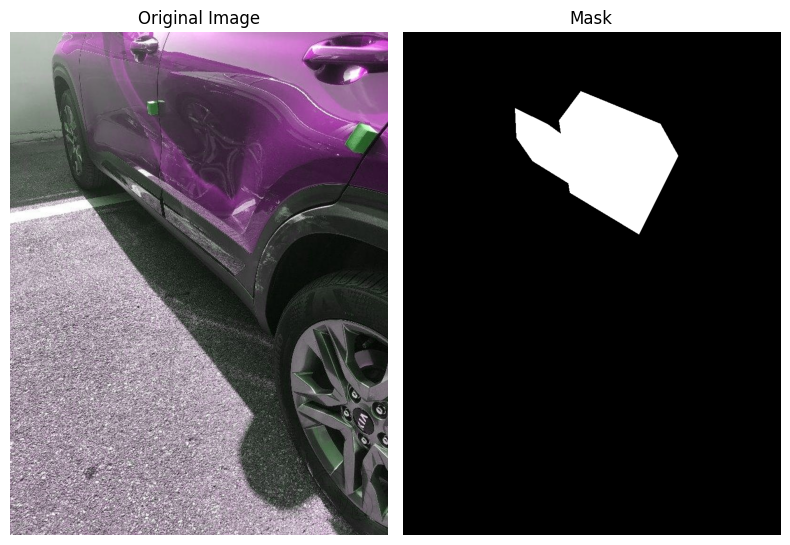

In [ ]:
# Mask Print
import matplotlib.pyplot as plt
import cv2

# ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
imagefile = '/content/sample_data/Split_data/train/images/0000802_as-7929891.jpg'
maskfile = '/content/sample_data/masks/train/0000802_as-7929891_mask.png'

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
image = cv2.imread(imagefile)  # Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄ
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB Î≥ÄÌôò
mask = cv2.imread(maskfile, cv2.IMREAD_GRAYSCALE)  # Grayscale ÎßàÏä§ÌÅ¨

# Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # Ï∂ï Ïà®Í∏∞Í∏∞

# ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')  # GrayscaleÎ°ú ÌëúÏãú
plt.title("Mask")
plt.axis('off')  # Ï∂ï Ïà®Í∏∞Í∏∞

plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()

In [ ]:
!pip install wandb
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!pip install evaluate
import os
from datasets import Dataset
from transformers import TrainingArguments, Trainer
import torch
from PIL import Image
from torchmetrics import JaccardIndex, Dice
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation

processor = SegformerImageProcessor()

# GPU ÏÇ¨Ïö© ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
train_images_dir = "/content/sample_data/Split_data/train/images"
train_masks_dir = "/content/sample_data/masks/train"

val_images_dir = "/content/sample_data/Split_data/valid/images"
val_masks_dir = "/content/sample_data/masks/valid"

# Î∞∞Í≤Ω ÌÅ¥ÎûòÏä§ Ìè¨Ìï®
label_mapping = {'Background': 0, 'Damaged': 1}

# id2label Î∞è label2id ÏÉùÏÑ±
id2label = {v: k for k, v in label_mapping.items()}  # ID -> Label
label2id = {k: v for k, v in label_mapping.items()}  # Label -> ID

# Ï∂úÎ†• ÌôïÏù∏
print("id2label:", id2label)
print("label2id:", label2id)

# ÎùºÎ≤® Í∞úÏàò
num_labels = len(id2label)
print("Number of labels:", num_labels)

id2label: {0: 'Background', 1: 'Damaged'}
label2id: {'Background': 0, 'Damaged': 1}
Number of labels: 2


In [ ]:
# Model

model_name = "nvidia/mit-b0"
processor = SegformerImageProcessor.from_pretrained(model_name)
model = SegformerForSemanticSegmentation.from_pretrained(
    model_name,
    num_labels = 2,
    id2label=id2label,
    label2id=label2id

)

model.to(device)  # Î™®Îç∏ÏùÑ GPUÎ°ú Ïù¥Îèô

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  

In [ ]:
# Load Dataset & Preprocessing

def load_data(images_dir, masks_dir):
    images = sorted(os.listdir(images_dir))
    masks = sorted(os.listdir(masks_dir))

    data = []
    for img_name, mask_name in zip(images, masks):
        image_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, mask_name)
        data.append({"image": image_path, "mask": mask_path})
    return data

train_data = load_data(train_images_dir, train_masks_dir)
val_data = load_data(val_images_dir, val_masks_dir)

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ
def preprocess(example):
    image = Image.open(example["image"]).convert("RGB").resize((512, 512))  # 512x512Î°ú Ï∂ïÏÜå
    mask = Image.open(example["mask"]).resize((512, 512))
    encoding = processor(image, mask, return_tensors="pt")
    encoding = {k: v.squeeze(0).to(device) for k, v in encoding.items()}
    return encoding


train_dataset = Dataset.from_list(train_data).map(preprocess)
val_dataset = Dataset.from_list(val_data).map(preprocess)

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

In [ ]:
# Evaluation Metrics
import torch
from torch import nn
import evaluate

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
  with torch.no_grad():
    logits, labels = eval_pred
    logits_tensor = torch.from_numpy(logits)
    # scale the logits to the size of the label
    logits_tensor = nn.functional.interpolate(
        logits_tensor,
        size=labels.shape[-2:],
        mode="bilinear",
        align_corners=False,
    ).argmax(dim=1)

    pred_labels = logits_tensor.detach().cpu().numpy()
    metrics = metric.compute(
        predictions=pred_labels,
        references=labels,
        num_labels=len(id2label),
        ignore_index=0,
        reduce_labels=processor.do_reduce_labels,
    )

    # add per category metrics as individual key-value pairs
    per_category_accuracy = metrics.pop("per_category_accuracy").tolist()
    per_category_iou = metrics.pop("per_category_iou").tolist()

    metrics.update({f"accuracy_{id2label[i]}": v for i, v in enumerate(per_category_accuracy)})
    metrics.update({f"iou_{id2label[i]}": v for i, v in enumerate(per_category_iou)})

    return metrics

In [ ]:
from transformers import TrainingArguments

epochs = 10
lr = 0.00006
batch_size = 4

training_args = TrainingArguments(
    "/content/segformer-b0-finetuned--outputs",
    learning_rate=lr,
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=100,
    eval_steps=100,
    logging_steps=1,
    eval_accumulation_steps=5,
    load_best_model_at_end=True,
)

# Trainer Ï†ïÏùò
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# ÌïôÏäµ ÏãúÏûë
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: kipyo39 (kipyo39-sungkyunkwan-university). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label
/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = 

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label
/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = 

TrainOutput(global_step=2100, training_loss=0.1178135240769812, metrics={'train_runtime': 7607.3973, 'train_samples_per_second': 1.104, 'train_steps_per_second': 0.276, 'total_flos': 1.472348263809024e+17, 'train_loss': 0.1178135240769812, 'epoch': 10.0})